In [35]:
import pandas as pd

# Load the CSV file
df1 = pd.read_csv('train_data_temp copy.csv')
# Get the column names as a list
col_names = df1.columns.tolist()

# Rename the magnitude columns
col_names[3:1003] = ['Magnitude_' + str(i) for i in range(1,1001)]

# Rename the phase columns
col_names[1003:2003] = ['Phase_' + str(i) for i in range(1,1001)]

# Rename the temperature columns
col_names[2003:3003] = ['Temp_' + str(i) for i in range(1,1001)]

# Leave the rest of the columns as they are
col_names[3003:] = ['Column_' + str(i) for i in range(3004,6004)]
# Assign the new column names to the DataFrame
df1.columns = col_names

# Mapping
mapping = {'Positiva': 100, 'midway': 50, 'Negativa': 0}

# Apply the mapping to the 'diagnosis' column
df1['diagnosis'] = df1['diagnosis'].map(mapping)

# Convert 'diagnosis' to numeric, coercing non-numeric values to NaN
df1['diagnosis'] = pd.to_numeric(df1['diagnosis'], errors='coerce')

# Replace NaN values with zero
df1['diagnosis'].fillna(0, inplace=True)


# Print the length of the filtered DataFrame
print(len(df1))


136


In [36]:

df = df1.iloc[:, :3003]
# df = df[df['serialNumber'] != '2C7707BD9710']
print(len(df))


136


In [37]:
df.head()

,sample_id,serialNumber,diagnosis,Magnitude_1,Magnitude_2,Magnitude_3,Magnitude_4,Magnitude_5,Magnitude_6,Magnitude_7,...,Temp_991,Temp_992,Temp_993,Temp_994,Temp_995,Temp_996,Temp_997,Temp_998,Temp_999,Temp_1000
0,6493148121addbc0101268e3,58C407BD9710,100.0,191334.0,192648.0,193191.0,196580.0,200041.0,204005.0,208713.0,...,36.5,36.5,36.5,36.5,36.5,36.5,36.5,36.5,36.5,36.5
1,649314c021addbc0101289bd,2C7707BD9710,100.0,5425796.0,5446503.0,5445896.0,5456571.0,5463455.0,5487258.0,5487080.0,...,40.5,40.0,40.0,40.5,40.5,40.0,40.5,40.5,40.5,40.5
2,649315f521addbc01012aa97,58C407BD9710,100.0,192191.0,193495.0,194220.0,197438.0,200728.0,205099.0,209533.0,...,36.5,36.5,36.5,36.5,36.5,36.5,37.0,36.5,36.5,36.5
3,6493163521addbc01012cb71,2C7707BD9710,100.0,5420628.0,5430528.0,5430520.0,5455383.0,5466183.0,5477908.0,5475677.0,...,40.0,40.5,40.0,40.0,40.5,40.5,40.5,40.5,40.5,40.5
4,6493176a21addbc01012ec4b,58C407BD9710,100.0,191606.0,193317.0,193998.0,196960.0,200558.0,204708.0,209400.0,...,36.5,36.5,36.5,36.5,36.5,36.5,36.5,36.5,36.5,36.5


In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame with all the necessary data

# Dropping 'sample_id' and 'serialNumber' columns, but keeping 'diagnosis'
df_viz = df.drop(['sample_id', 'serialNumber'], axis=1)

# Get all unique diagnosis values and sort them
unique_diagnoses = np.sort(df_viz['diagnosis'].unique())

# Generate a color map that spans the range of unique diagnosis values
color_map = plt.cm.get_cmap('viridis', len(unique_diagnoses))

# Assign a color to each diagnosis value
diagnosis_color_dict = {diag: color_map(i) for i, diag in enumerate(unique_diagnoses)}

# Creating the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Iterate over DataFrame rows
for index, row in df_viz.iterrows():
    # The last element is the diagnosis for each row
    diagnosis = row['diagnosis']  # Directly reference the diagnosis column
    color = diagnosis_color_dict[diagnosis]
    # Plotting each set of measurements with phase on the x-axis and temperature on the z-axis
    for i in range(3, len(row) - 1, 3):  # Skip first 3 columns which are diagnosis, sample_id, and serialNumber
        phase = row[i]  # Now phase is on the x-axis
        magnitude = row[i + 1]
        temp = row[i + 2]  # Now temperature is on the z-axis
        ax.scatter(phase, magnitude, temp, color=color)

# Adding labels with switched axes
ax.set_xlabel('Phase')
ax.set_ylabel('Magnitude')
ax.set_zlabel('Temperature')

# Create custom legend
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], marker='o', color='w', label='Diagnosis {:.1f}'.format(diag),
                        markerfacecolor=diagnosis_color_dict[diag], markersize=10) 
                for diag in unique_diagnoses]
ax.legend(handles=custom_lines, title='Diagnosis', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('3D Scatter Plot of Phase, Magnitude, and Temperature by Diagnosis')
plt.show()


#column notes
•just using first tempature group

•last one is the circut temp

In [39]:
import pandas as pd
import numpy as np
import random
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame named 'df1' with features and the diagnosis column
X = df.drop(['diagnosis', 'sample_id', 'serialNumber'], axis=1)
y = df['diagnosis']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#scale the data
scaler = StandardScaler()

# Fit on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



2. Hyperparameter Tuning


## GradientBoostingRegressor

In [40]:
# from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [190, 200, 210],
    'max_depth': [2, 3],
    'learning_rate': [0.08, 0.1, 0.12],
    'min_samples_split': [2],
    'min_samples_leaf': [4, 5],
    'max_features': [15, 'sqrt']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Use the best estimator for predictions
model_best = grid_search.best_estimator_
# y_pred = model_best.predict(X_test_scaled)


Best parameters: {'learning_rate': 0.08, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 210}


In [41]:
import math
from sklearn.utils import resample

# Predictions and Evaluation
predictions = model_best.predict(X_test_scaled)
rmse = math.sqrt(mean_squared_error(y_test, predictions))

# Display results
print(f'Validation RMSE: {rmse:.2f}')

# Display best parameters from GridSearchCV
print("Best parameters:", grid_search.best_params_)

# Bootstrapping for Model Validation
n_iterations = 1000
n_size = int(len(X_train_scaled))  # Use 70% of the training data for each bootstrap sample
rmse_list = []

for i in range(n_iterations):
    # Resample the data
    X_resample, y_resample = resample(X_train_scaled, y_train, n_samples=n_size, replace=True, random_state=i)
    
    # Fit the model with resampled data
    model_best.fit(X_resample, y_resample)  # Use your best model here
    
    # Evaluate the model on the test set
    predictions = model_best.predict(X_test_scaled)
    rmse_bootstrap = math.sqrt(mean_squared_error(y_test, predictions))
    rmse_list.append(rmse_bootstrap)

# Confidence Interval
alpha = 0.95
lower_p = ((1.0 - alpha) / 2.0) * 100
upper_p = (alpha + ((1.0 - alpha) / 2.0)) * 100
lower = np.percentile(rmse_list, lower_p)
upper = np.percentile(rmse_list, upper_p)

print(f'Bootstrap Confidence Interval {alpha * 100:.1f}%: {lower:.2f} - {upper:.2f}')


Validation RMSE: 2.35
Best parameters: {'learning_rate': 0.08, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 210}
Bootstrap Confidence Interval 95.0%: 2.05 - 12.36


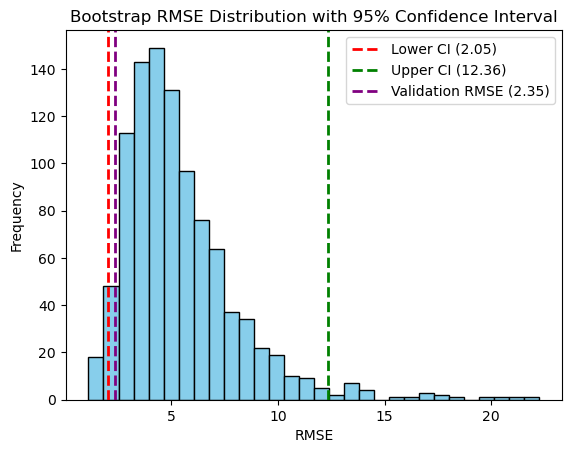

In [42]:
import matplotlib.pyplot as plt

# Plotting the RMSE values from bootstrapping
plt.hist(rmse_list, bins=30, color='skyblue', edgecolor='black')
plt.axvline(lower, color='red', linestyle='dashed', linewidth=2, label=f'Lower CI ({lower:.2f})')
plt.axvline(upper, color='green', linestyle='dashed', linewidth=2, label=f'Upper CI ({upper:.2f})')
plt.axvline(rmse, color='purple', linestyle='dashed', linewidth=2, label=f'Validation RMSE ({rmse:.2f})')

plt.title('Bootstrap RMSE Distribution with 95% Confidence Interval')
plt.xlabel('RMSE')
plt.ylabel('Frequency')
plt.legend()
plt.show()


the purple line, which represents the validation RMSE of 4.78, does indeed fall within the confidence interval between the red and green dashed lines. This means that the model's performance on the validation set is consistent with the range of outcomes predicted by the bootstrap analysis.

Here’s the corrected interpretation:

Lower Confidence Interval (CI) - Red Dashed Line (2.05): Indicates that 95% of the bootstrapped RMSE values are expected to be above 2.05. This suggests that the model generally performs at least this well on the resampled datasets.

Upper Confidence Interval (CI) - Green Dashed Line (12.36): Suggests that 95% of the bootstrapped RMSE values are below 12.36. This is the range within which the model's performance is expected to lie with 95% confidence based on the bootstrapped samples.

Validation RMSE - Purple Dashed Line (4.78): This line shows the RMSE on the validation dataset. Its position within the confidence interval indicates that the validation performance is well within the expected range of the model's performance as determined by the bootstrapping. This is a positive sign that the model is likely to perform similarly on new, unseen data if it's representative of the training set.

The presence of the validation RMSE within the confidence interval suggests that the model is stable and generalizes well. The width of the confidence interval still suggests some variability in the model's performance, but the fact that the validation RMSE is not on the extreme end of this interval is reassuring.




# cv results


In [43]:
from sklearn.model_selection import cross_validate

cv_folds = 5
cv_results = cross_validate(model_best, X_train_scaled, y_train, cv=cv_folds,
                            return_train_score=True, scoring='neg_mean_squared_error')

# Extract training and test scores
train_scores = cv_results['train_score']
test_scores = cv_results['test_score']

# Calculate the mean and standard deviation for both
mean_train_score = np.mean(train_scores)
std_train_score = np.std(train_scores)
mean_test_score = np.mean(test_scores)
std_test_score = np.std(test_scores)

# Print the results
print("Training Scores:", train_scores)
# print("Mean Training Score:", mean_train_score)
# print("Std Training Score:", std_train_score)

print("Test Scores:", test_scores)
# print("Mean Test Score:", mean_test_score)
# print("Std Test Score:", std_test_score)

Training Scores: [-0.04297647 -0.03971569 -0.0491645  -0.01539935 -0.05781819]
Test Scores: [-53.30179449  -2.04677546 -18.99422515  -9.41891462 -35.17142549]


In [44]:
from sklearn.model_selection import cross_val_predict
import pandas as pd

# Generate cross-validated estimates for each input data point
predicted = cross_val_predict(model_best, X_train_scaled, y_train, cv=cv_folds)

# Convert the predicted values and actual values (y_train) to a DataFrame for easier comparison
comparison_df = pd.DataFrame({'Actual': y_train, 'Predicted': predicted})

# Reset the index of the DataFrame if needed
comparison_df = comparison_df.reset_index(drop=True)

# Now you can view or analyze the comparison DataFrame
print(comparison_df)


     Actual  Predicted
0     100.0  99.921971
1       0.0   0.106551
2      50.0  49.766516
3     100.0  98.308697
4     100.0  84.850940
..      ...        ...
103     0.0   6.954696
104    50.0  49.907268
105   100.0  98.774299
106    50.0  50.010844
107    50.0  50.010844

[108 rows x 2 columns]


In [45]:
# Use the best estimator for predictions
model_best = grid_search.best_estimator_

# Train the model
model_best.fit(X_train_scaled, y_train)

y_pred = model_best.predict(X_test_scaled)

# Calculate mean squared error (MSE) and R-squared (R²) for the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Initialize lists to store the results
results = []

# Loop through the test set and make predictions
for i in range(len(X_test_scaled)):

    # Choose a specific input data point to observe the response
    input_data = X_test_scaled[i]  # Select the desired input data point

    # Reshape the input data to match the model's input shape
    input_data = np.array([input_data])

    # Make a prediction for the chosen input data point
    predicted_output = model_best.predict(input_data)

    # Retrieve the corresponding actual output
    actual_output = y_test.iloc[i]  # Select the actual output for the chosen input data point

    # Append the results to the list
    results.append([i, input_data, predicted_output, actual_output])

# Create a DataFrame from the results
columns = ['i','Input Data', 'Predicted Output', 'Actual Output']
df_results = pd.DataFrame(results, columns=columns)

# Calculate the difference between predicted output and actual output
df_results['Difference'] = df_results['Predicted Output'] - df_results['Actual Output']

# Print the DataFrame
print(df_results)
# print(df_results['Difference'])


Mean Squared Error: 5.5230984030978405
R-squared: 0.997169863301942
     i                                         Input Data  \
0    0  [[-0.8729743492230301, -0.8922946044733605, -0...   
1    1  [[1.240477234664636, 1.1338909452640427, 1.149...   
2    2  [[1.2458314825663643, 1.138606267840626, 1.154...   
3    3  [[1.241032780307926, 1.1354131265154082, 1.151...   
4    4  [[1.2377382936349186, 1.1366207468278013, 1.15...   
5    5  [[1.2451135155786364, 1.1380188813206777, 1.15...   
6    6  [[-0.8726596073640317, -0.89196033517089, -0.8...   
7    7  [[-0.873337979098638, -0.8925052134558419, -0....   
8    8  [[1.239991586764102, 1.1323301201626808, 1.148...   
9    9  [[1.2448783682590765, 1.1376181445962132, 1.15...   
10  10  [[-0.8726123354802027, -0.8920781989133797, -0...   
11  11  [[1.240207340490296, 1.1342982514430067, 1.150...   
12  12  [[-0.8726188000113246, -0.8920878598758788, -0...   
13  13  [[-0.8727537470984946, -0.8920024569673863, -0...   
14  14  [[1.24647

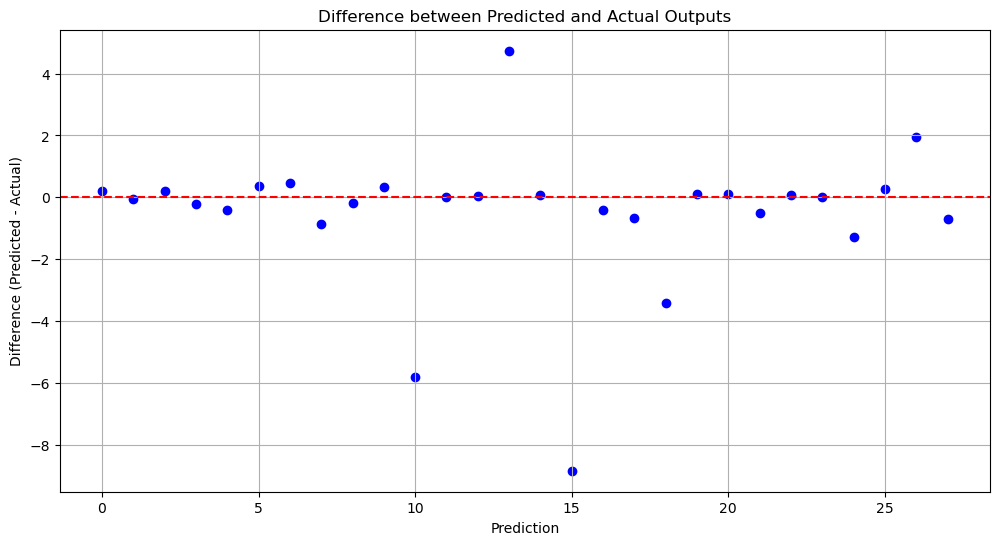

In [46]:
import matplotlib.pyplot as plt

# Plotting the differences
plt.figure(figsize=(12, 6))
plt.scatter(df_results.index, df_results['Difference'], color='blue')
plt.title('Difference between Predicted and Actual Outputs')
plt.xlabel('Prediction')
plt.ylabel('Difference (Predicted - Actual)')
plt.axhline(0, color='red', linestyle='--')
plt.grid(True)
plt.show()


## GradientBoostingRegressor

Mean Squared Error: 5.5230984030978405
R-squared: 0.997169863301942
            feature  mean_abs_shap_val
347   Magnitude_348           2.359872
1434      Phase_435           2.287059
1445      Phase_446           2.249186
1480      Phase_481           1.970885
354   Magnitude_355           1.698539
1444      Phase_445           1.618055
829   Magnitude_830           1.501665
1710      Phase_711           1.473678
356   Magnitude_357           1.459996
845   Magnitude_846           1.438976
360   Magnitude_361           1.355784
1473      Phase_474           1.309159
1454      Phase_455           1.274746
1701      Phase_702           1.236348
1453      Phase_454           1.108009
1291      Phase_292           1.106039
1139      Phase_140           1.105082
1943      Phase_944           1.103627
849   Magnitude_850           1.029004
1955      Phase_956           1.001822


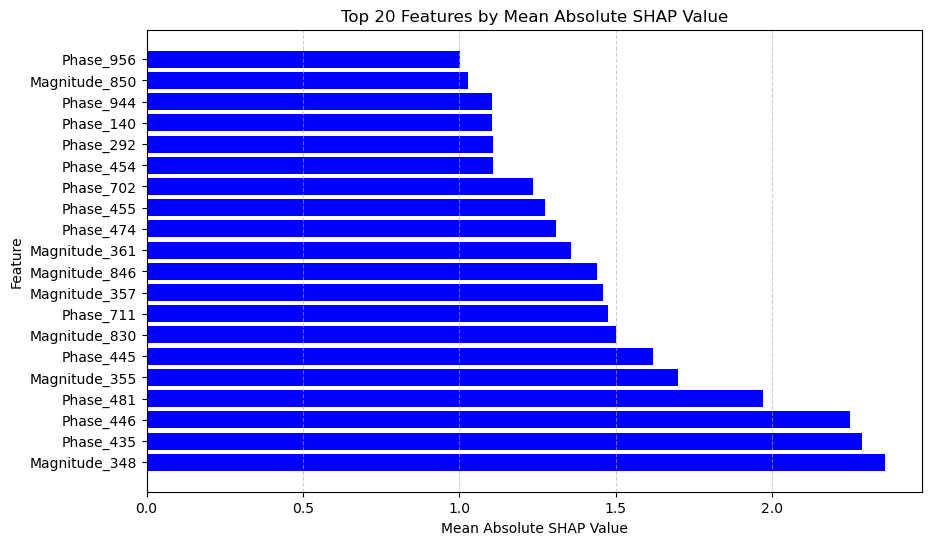

In [47]:
import matplotlib.pyplot as plt
# Create a Gradient Boosting regression model

# Train the model
model_best.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_best.predict(X_test)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Use SHAP for feature importance
explainer = shap.TreeExplainer(model_best)
shap_values = explainer.shap_values(X_test)

# Calculate the mean absolute SHAP values for each feature
mean_abs_shap_values = np.mean(np.abs(shap_values), axis=0)

# Create a DataFrame of the features and their mean absolute SHAP values
shap_df1_selected = pd.DataFrame(list(zip(X.columns, mean_abs_shap_values)), columns=['feature', 'mean_abs_shap_val'])

# Sort the DataFrame by the mean absolute SHAP values in descending order and select the top 20 features
top_20_features = shap_df1_selected.sort_values('mean_abs_shap_val', ascending=False).head(20)

print(top_20_features)

# Sort the top features by mean absolute SHAP values in descending order
top_20_features = top_20_features.sort_values('mean_abs_shap_val', ascending=True)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_20_features['feature'], top_20_features['mean_abs_shap_val'], color='blue')
plt.xlabel('Mean Absolute SHAP Value')
plt.ylabel('Feature')
plt.title('Top 20 Features by Mean Absolute SHAP Value')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.show()


In [48]:
# Assuming top_20_features is your DataFrame
top_20_features['frequency'] = top_20_features['feature'].str.extract('(\d+)').astype(int)  # Extract frequency from feature

# Create separate DataFrames for Magnitude, Phase, and Temperature
top_20_features_magnitude = top_20_features[top_20_features['feature'].str.contains('Magnitude')].copy()
top_20_features_phase = top_20_features[top_20_features['feature'].str.contains('Phase')].copy()
top_20_features_temperature = top_20_features[top_20_features['feature'].str.contains('Temp')].copy()

# Find frequencies that have missing Phase, Magnitude, or Temperature
missing_phase_frequencies = set(top_20_features_magnitude['frequency']) - set(top_20_features_phase['frequency'])
missing_magnitude_frequencies = set(top_20_features_phase['frequency']) - set(top_20_features_magnitude['frequency'])
missing_temperature_frequencies = set(top_20_features_magnitude['frequency']).union(set(top_20_features_phase['frequency'])) - set(top_20_features_temperature['frequency'])

# Create new Phase, Magnitude, and Temperature entries for these frequencies
new_phase_entries = pd.DataFrame({
    'feature': 'Phase_' + pd.Series(list(missing_phase_frequencies)).astype(str),
    'mean_abs_shap_val': np.nan,  # Replace with synthetic data as needed
    'frequency': list(missing_phase_frequencies)
})

new_magnitude_entries = pd.DataFrame({
    'feature': 'Magnitude_' + pd.Series(list(missing_magnitude_frequencies)).astype(str),
    'mean_abs_shap_val': np.nan,  # Replace with synthetic data as needed
    'frequency': list(missing_magnitude_frequencies)
})

new_temperature_entries = pd.DataFrame({
    'feature': 'Temp_' + pd.Series(list(missing_temperature_frequencies)).astype(str),
    'mean_abs_shap_val': np.nan,  # Replace with synthetic data as needed
    'frequency': list(missing_temperature_frequencies)
})

# Append the new entries to the original DataFrame
top_20_features_final = pd.concat([top_20_features, new_phase_entries, new_magnitude_entries, new_temperature_entries], ignore_index=True)

# Reorder the rows to make Magnitude, Phase, and Temperature for each frequency adjacent
top_20_features_final.sort_values('frequency', inplace=True)
top_20_features_final.reset_index(drop=True, inplace=True)

# Create a sort_order column
top_20_features_final['sort_order'] = top_20_features_final['frequency'] * 10  # Multiply by 10 to create a gap for 'Magnitude', 'Phase', and 'Temp'
top_20_features_final.loc[top_20_features_final['feature'].str.contains('Phase'), 'sort_order'] += 3  # Add 3 for 'Phase'
top_20_features_final.loc[top_20_features_final['feature'].str.contains('Magnitude'), 'sort_order'] += 2  # Add 2 for 'Magnitude'
top_20_features_final.loc[top_20_features_final['feature'].str.contains('Temp'), 'sort_order'] += 1  # Add 1 for 'Temp'

# Sort the DataFrame
top_20_features_final.sort_values('sort_order', inplace=True)
top_20_features_final.reset_index(drop=True, inplace=True)

# You can drop the sort_order column if you don't need it anymore
top_20_features_final.drop(columns=['sort_order'], inplace=True)

features_array = top_20_features_final['feature'].values
# Opening a file in write mode ('w')
with open('features.txt', 'w') as f:
    for item in features_array:
        # Writing each feature on a new line
        f.write("%s\n" % item)

print("Features have been written to 'features.txt'.")

# Convert combined_array to a NumPy array if it's not already
combined_array = np.array(features_array)

# Create a list of additional column headers
additional_columns = ['sample_id', 'serialNumber', 'diagnosis']

# Concatenate the two arrays
selected_columns = df[np.concatenate((features_array, additional_columns))]


Features have been written to 'features.txt'.


## need to retrain on selected columns

In [49]:
selected_columns

,Temp_140,Magnitude_140,Phase_140,Temp_292,Magnitude_292,Phase_292,Temp_348,Magnitude_348,Phase_348,Temp_355,...,Phase_850,Temp_944,Magnitude_944,Phase_944,Temp_956,Magnitude_956,Phase_956,sample_id,serialNumber,diagnosis
0,36.5,3392297.0,3060349.0,36.5,5047177.0,3566160.0,36.5,5964083.0,3777276.0,36.5,...,3506501.0,36.5,5557358.0,3907890.0,36.5,5706307.0,3948777.0,6493148121addbc0101268e3,58C407BD9710,100.0
1,40.5,6807614.0,2916750.0,40.0,8138054.0,3023500.0,40.5,8112794.0,3124782.0,40.0,...,2305079.0,40.5,3341155.0,1635060.0,40.5,3515478.0,1832176.0,649314c021addbc0101289bd,2C7707BD9710,100.0
2,36.5,3393384.0,3060771.0,36.5,5047772.0,3566152.0,36.5,5964320.0,3777250.0,37.0,...,3506357.0,36.0,5543610.0,3907824.0,37.0,5705786.0,3948665.0,649315f521addbc01012aa97,58C407BD9710,100.0
3,40.5,6811141.0,2916389.0,40.5,8138002.0,3023267.0,40.5,8112890.0,3124695.0,40.5,...,2305253.0,40.5,3339817.0,1635138.0,40.5,3516245.0,1832553.0,6493163521addbc01012cb71,2C7707BD9710,100.0
4,36.5,3392884.0,3060885.0,36.5,5047053.0,3566061.0,36.5,5963797.0,3777219.0,36.5,...,3506362.0,36.5,5542819.0,3907883.0,36.5,5705072.0,3948748.0,6493176a21addbc01012ec4b,58C407BD9710,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,39.0,3393190.0,3069789.0,38.5,5051881.0,3564656.0,38.5,5962139.0,3774761.0,38.5,...,3501771.0,38.5,5552832.0,3906582.0,39.0,5715528.0,3947377.0,64938c1521addbc010242fe9,58C407BD9710,50.0
132,42.5,6833770.0,2892670.0,42.5,8134805.0,3014943.0,42.5,8115011.0,3128418.0,42.0,...,2282994.0,42.5,3264182.0,1646512.0,42.0,3553618.0,1848786.0,64938c3221addbc0102450c3,2C7707BD9710,50.0
133,38.5,3393143.0,3069658.0,39.0,5051628.0,3564778.0,38.5,5961976.0,3774854.0,38.5,...,3501772.0,38.5,5552337.0,3906521.0,38.5,5715087.0,3947422.0,64938d8921addbc01024719d,58C407BD9710,50.0
134,42.5,6834103.0,2893090.0,42.5,8134767.0,3014899.0,42.5,8114840.0,3128638.0,42.5,...,2283301.0,42.5,3251269.0,1645869.0,42.5,3551367.0,1848080.0,64938da721addbc010249277,2C7707BD9710,50.0


### bellow are commented out because they take a long time to load

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


# Using seaborn to plot the data
sns.pairplot(selected_columns)
plt.show()

In [51]:
sns.scatterplot(data=selected_columns)


In [52]:
# Assuming you have a DataFrame named 'df1' with features and the diagnosis column
X = selected_columns.drop(['diagnosis', 'sample_id', 'serialNumber'], axis=1)
y = selected_columns['diagnosis']

# Split the data into train and test sets
X_train_cap, X_test_cap, y_train_cap, y_test_cap = train_test_split(X, y, test_size=0.2, random_state=42)
#scale the data


In [53]:
## make the 2D graphs of some of the variables

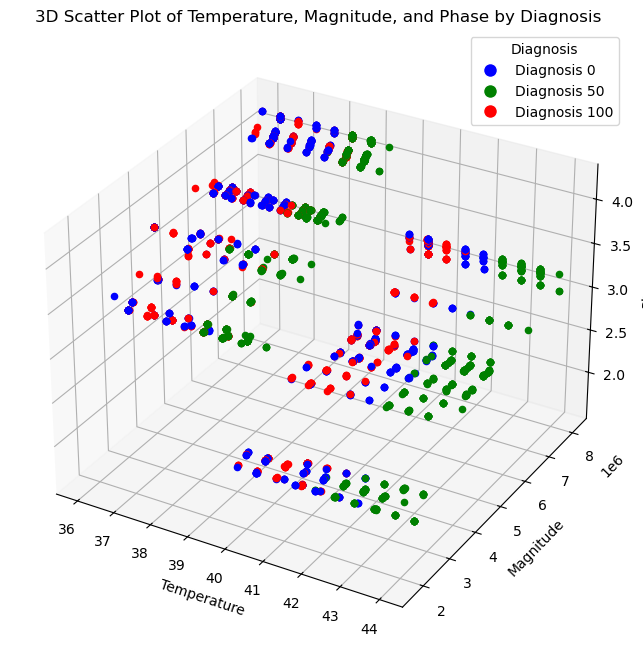

In [54]:
# Assuming 'selected_columns' is your DataFrame with all the necessary data

# Dropping 'sample_id' and 'serialNumber' columns, but keeping 'diagnosis'
df = selected_columns.drop(['sample_id', 'serialNumber'], axis=1)

# Define a simple hue dictionary for diagnosis values
hue_dict = {0: 'blue', 50: 'green', 100: 'red'}

# Creating the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Iterate over DataFrame rows
for index, row in df.iterrows():
    # The last element is the diagnosis for each row
    diagnosis = row[-1]
    color = hue_dict[diagnosis]
    # Plotting each set of measurements
    for i in range(0, len(row) - 1, 3):  # Skip last column, which is diagnosis
        temp = row[i]
        magnitude = row[i + 1]
        phase = row[i + 2]
        ax.scatter(temp, magnitude, phase, color=color)

# Adding labels
ax.set_xlabel('Temperature')
ax.set_ylabel('Magnitude')
ax.set_zlabel('Phase')

# Create custom legend
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], marker='o', color='w', label='Diagnosis {}'.format(diag),
                        markerfacecolor=hue, markersize=10) for diag, hue in hue_dict.items()]
ax.legend(handles=custom_lines, title='Diagnosis')

plt.title('3D Scatter Plot of Temperature, Magnitude, and Phase by Diagnosis')
plt.show()


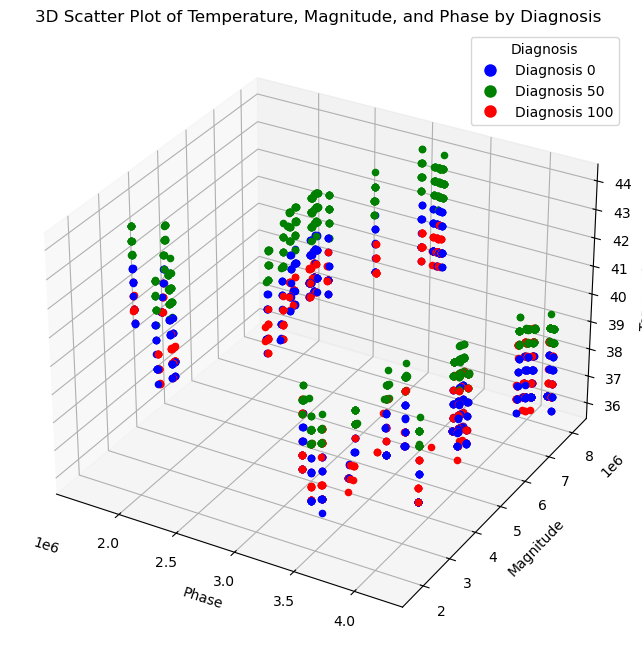

In [55]:
# Assuming 'selected_columns' is your DataFrame with all the necessary data

# Dropping 'sample_id' and 'serialNumber' columns, but keeping 'diagnosis'
df = selected_columns.drop(['sample_id', 'serialNumber'], axis=1)

# Define a simple hue dictionary for diagnosis values
hue_dict = {0: 'blue', 50: 'green', 100: 'red'}

# Creating the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Iterate over DataFrame rows
for index, row in df.iterrows():
    # The last element is the diagnosis for each row
    diagnosis = row[-1]
    color = hue_dict[diagnosis]
    # Plotting each set of measurements
    for i in range(0, len(row) - 1, 3):  # Skip last column, which is diagnosis
        temp = row[i]
        magnitude = row[i + 1]
        phase = row[i + 2]
        ax.scatter(phase, magnitude, temp, color=color)

# Adding labels
ax.set_xlabel('Phase')
ax.set_ylabel('Magnitude')
ax.set_zlabel('Temperature')

# Create custom legend
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], marker='o', color='w', label='Diagnosis {}'.format(diag),
                        markerfacecolor=hue, markersize=10) for diag, hue in hue_dict.items()]
ax.legend(handles=custom_lines, title='Diagnosis')

plt.title('3D Scatter Plot of Temperature, Magnitude, and Phase by Diagnosis')
plt.show()


## now test

In [56]:


# Create a scaler
scaler = StandardScaler()

# Fit on the training data
X_train_scaled_cap = scaler.fit_transform(X_train_cap)

# Apply the scaling to the test data
X_test_scaled_cap = scaler.transform(X_test_cap)

# Create a Gradient Boosting regression model
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [190, 200, 210],
    'max_depth': [2, 3],
    'learning_rate': [0.08, 0.1, 0.12],
    'min_samples_split': [2],
    'min_samples_leaf': [4, 5],
    'max_features': [15, 'sqrt']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train_scaled_cap, y_train_cap)

# Best parameters
print("Best parameters:", grid_search.best_params_)



Best parameters: {'learning_rate': 0.08, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 210}


In [57]:
mini_best = grid_search.best_estimator_


In [58]:
from sklearn.model_selection import cross_validate

cv_folds = 5
cv_results = cross_validate(mini_best, X_train_scaled_cap, y_train_cap, cv=cv_folds,
                            return_train_score=True, scoring='neg_mean_squared_error')

# Extract training and test scores
train_scores = cv_results['train_score']
test_scores = cv_results['test_score']

# Calculate the mean and standard deviation for both
mean_train_score = np.mean(train_scores)
std_train_score = np.std(train_scores)
mean_test_score = np.mean(test_scores)
std_test_score = np.std(test_scores)

# Print the results
print("Training Scores:", train_scores)
print("Mean Training Score:", mean_train_score)
print("Std Training Score:", std_train_score)

print("Test Scores:", test_scores)
print("Mean Test Score:", mean_test_score)
print("Std Test Score:", std_test_score)

Training Scores: [-0.55569867 -0.39003391 -0.15001997 -0.32409675 -0.31459487]
Mean Training Score: -0.3468888335545739
Std Training Score: 0.13098303235754083
Test Scores: [-33.06522772 -22.63694331 -16.208024    -2.60957975 -18.78659348]
Mean Test Score: -18.661273654253975
Std Test Score: 9.86884854703357


In [59]:
# Use the best estimator for predictions
mini_best = grid_search.best_estimator_

# Train the model
mini_best.fit(X_train_scaled_cap, y_train_cap)

# Make predictions on the test set
y_pred_cap = mini_best.predict(X_test_scaled_cap)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test_cap, y_pred_cap)

# Calculate R-squared (R²)
r2 = r2_score(y_test_cap, y_pred_cap)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Initialize lists to store the results
results = []
random_numbers = []

# Loop through the test set and make predictions
for _ in range(len(X_test_scaled_cap)):
    random_number = random.randint(0, len(X_test_scaled_cap) - 1)
    random_numbers.append(random_number)

    # Choose a specific input data point to observe the response
    input_data = X_test_scaled_cap[random_number]  # Select the desired input data point

    # Reshape the input data to match the model's input shape
    input_data = np.array([input_data])

    # Make a prediction for the chosen input data point
    predicted_output = mini_best.predict(input_data)

    # Retrieve the corresponding actual output
    actual_output = y_test_cap.iloc[random_number]  # Select the actual output for the chosen input data point

    # Append the results to the list
    results.append([random_number, input_data, predicted_output, actual_output])

# Create a DataFrame from the results
columns = ['rand numb', 'Input Data', 'Predicted Output', 'Actual Output']
df_results = pd.DataFrame(results, columns=columns)

# Calculate the difference between predicted output and actual output
df_results['Difference'] = df_results['Predicted Output'] - df_results['Actual Output']

# Print the DataFrame
print(df_results)
# print(df_results['Difference'])


Mean Squared Error: 4.370561661570223
R-squared: 0.9977604442204764
    rand numb                                         Input Data  \
0          25  [[-1.5039164914515135, -0.8815661026938472, 0....   
1          10  [[-1.2732020296947473, -0.882020636903063, 0.7...   
2           1  [[0.3417992026026166, 1.1377297226622258, -1.0...   
3           4  [[1.4953715113864479, 1.1381590049709298, -1.2...   
4          27  [[-0.8117731061812148, -0.8773220216473314, 0....   
5           3  [[0.5725136643593829, 1.1369809744493702, -1.0...   
6          12  [[-1.2732020296947473, -0.8796745591694487, 0....   
7          10  [[-1.2732020296947473, -0.882020636903063, 0.7...   
8          12  [[-1.2732020296947473, -0.8796745591694487, 0....   
9          10  [[-1.2732020296947473, -0.882020636903063, 0.7...   
10         10  [[-1.2732020296947473, -0.882020636903063, 0.7...   
11         20  [[1.4953715113864479, 1.1423637400329267, -1.2...   
12         23  [[-1.2732020296947473, -0.8819431

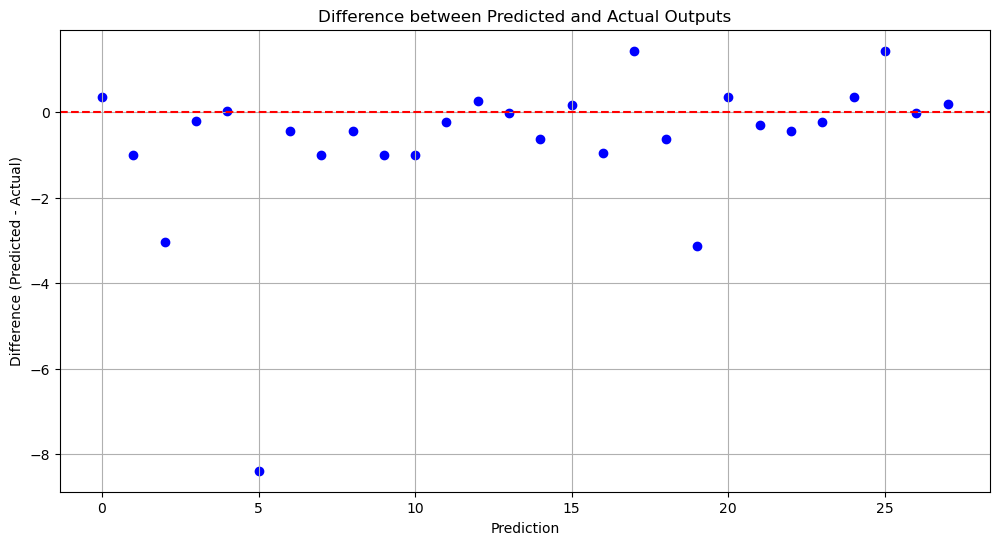

In [60]:

# Plotting the differences
plt.figure(figsize=(12, 6))
plt.scatter(df_results.index, df_results['Difference'], color='blue')
plt.title('Difference between Predicted and Actual Outputs')
plt.xlabel('Prediction')
plt.ylabel('Difference (Predicted - Actual)')
plt.axhline(0, color='red', linestyle='--')
plt.grid(True)
plt.show()


In [61]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(mini_best, X_train_scaled_cap, y_train_cap, cv=5, scoring='r2')

# The scores array will hold the R-squared score of each fold
print("R-squared scores for each fold:", scores)

# You can compute the average and standard deviation to see the overall performance and the variance
print("Average R-squared:", scores.mean())
print("Standard deviation of R-squared:", scores.std())

R-squared scores for each fold: [0.9780773  0.98667929 0.9879775  0.99792644 0.98421926]
Average R-squared: 0.9869759590204253
Standard deviation of R-squared: 0.00644654419175221


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


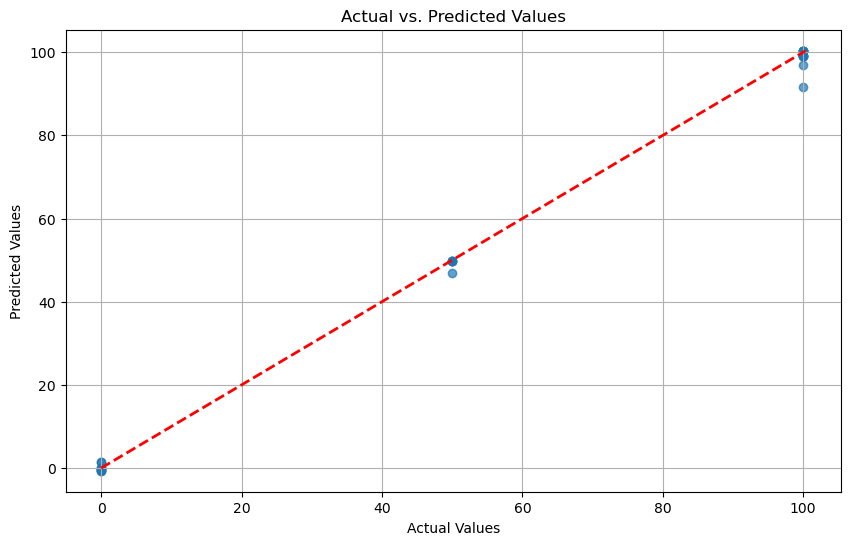

In [62]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_results['Actual Output'], df_results['Predicted Output'], alpha=0.7)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
max_value = max(df_results['Actual Output'].max(), df_results['Predicted Output'].max())
plt.plot([0, max_value], [0, max_value], color='red', linestyle='--', linewidth=2)

# Show the plot
plt.show()
